In [354]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy import stats
z90 = 1.645
z95 = 1.96
z99 = 2.576

In [356]:
# figure 6.8
print("a) ",1 - stats.chi2.cdf(6.25, 3)) # calculate the tail area in a chi2 distribution
print("b) ",1 - stats.chi2.cdf(4.3, 2))
print("c) ",1 - stats.chi2.cdf(5.1, 5))
print("d) ",1 - stats.chi2.cdf(11.7, 7))
print("e) ",1 - stats.chi2.cdf(10, 4))
print("f) ",1 - stats.chi2.cdf(9.21, 3))

a)  0.100060833119
b)  0.116484157773
c)  0.403798457104
d)  0.110866245605
e)  0.0404276819945
f)  0.0266252743364


In [357]:
xu100 = pd.read_csv("data/XU100.csv", na_values = "null")
xu100.dropna(inplace=True)
xu100.reset_index(inplace=True,drop=True)
xu100.info()
len(xu100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6325 entries, 0 to 6324
Data columns (total 7 columns):
Date         6325 non-null object
Open         6325 non-null float64
High         6325 non-null float64
Low          6325 non-null float64
Close        6325 non-null float64
Adj Close    6325 non-null float64
Volume       6325 non-null float64
dtypes: float64(6), object(1)
memory usage: 346.0+ KB


6325

In [359]:
xu100["Change in Price"] = xu100["Close"] - xu100["Close"].shift()
xu100["Outcome"] = xu100["Change in Price"].apply(lambda x: "Up" if x>= 0 else ("Down" if pd.notnull(x)==True else ""))
#xu100["Days to Up"]
xu100.head(20)
len(xu100)

6325

In [343]:
# if previous day is up and actual day is up, it's 1
# if previous day is down and actual day is up, count how many days were down since the last up
# if actual day is down simply don't count.
# at last, you don't need the index num 0 row, drop it.

count = 1
days_to_up = list()
for a in xu100["Outcome"].index.tolist()[1:]:
    #print(a)
    oper = xu100["Outcome"][a]
    prev = xu100["Outcome"][a-1]
    #print("previous is: ", prev)
    #print("actual is: ", oper)

    if oper == "Down":
        count = count + 1
        days_to_up.append("-")
    elif oper == "Up" and prev == "Down":
        #print("Count is: ", count)
        days_to_up.append(count)
        count = 1
    else:
        count = 1
        days_to_up.append(count)
        
days_to_up = np.array(days_to_up)
len(days_to_up)

6324

In [360]:
xu100.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Change in Price,Outcome
0,1997-07-01,1857.0,1864.0,1826.0,1851.0,1851.0,2342600.0,NaN,
1,1997-07-02,1851.0,1877.0,1849.0,1873.0,1873.0,2946200.0,22.0,Up
2,1997-07-03,1873.0,1916.0,1871.0,1912.0,1912.0,3660300.0,39.0,Up
3,1997-07-04,1912.0,1936.0,1897.0,1918.0,1918.0,3411100.0,6.0,Up
4,1997-07-07,1918.0,1963.0,1918.0,1953.0,1953.0,3045500.0,35.0,Up


In [361]:
xu100_d = xu100.copy()
xu100_d.drop([0],inplace=True)
xu100_d.reset_index(inplace=True,drop=True)
xu100_d["Days to Up"] = days_to_up
xu100_d.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Change in Price,Outcome,Days to Up
0,1997-07-02,1851.0,1877.0,1849.0,1873.0,1873.0,2946200.0,22.0,Up,1
1,1997-07-03,1873.0,1916.0,1871.0,1912.0,1912.0,3660300.0,39.0,Up,1
2,1997-07-04,1912.0,1936.0,1897.0,1918.0,1918.0,3411100.0,6.0,Up,1
3,1997-07-07,1918.0,1963.0,1918.0,1953.0,1953.0,3045500.0,35.0,Up,1
4,1997-07-08,1953.0,1959.0,1894.0,1911.0,1911.0,2426500.0,-42.0,Down,-
5,1997-07-09,1911.0,1951.0,1911.0,1951.0,1951.0,3090400.0,40.0,Up,2
6,1997-07-10,1951.0,2010.0,1951.0,1999.0,1999.0,4169400.0,48.0,Up,1
7,1997-07-11,1999.0,2027.0,1971.0,2027.0,2027.0,3914500.0,28.0,Up,1
8,1997-07-14,2027.0,2056.0,2003.0,2043.0,2043.0,4112600.0,16.0,Up,1
9,1997-07-15,2043.0,2060.0,2017.0,2036.0,2036.0,3202900.0,-7.0,Down,-


In [362]:
xu100_t = xu100_d.set_index("Date")
xu100_t = xu100_t.T
xu100_t

Date,1997-07-02,1997-07-03,1997-07-04,1997-07-07,1997-07-08,1997-07-09,1997-07-10,1997-07-11,1997-07-14,1997-07-15,...,2022-10-13,2022-10-14,2022-10-17,2022-10-18,2022-10-19,2022-10-20,2022-10-21,2022-10-24,2022-10-25,2022-10-26
Open,1851,1873,1912,1918,1953,1911,1951,1999,2027,2043,...,3529.8,3584.9,3641.4,3877.9,3851.4,3889.8,3905.3,3946.1,3983.4,3989.7
High,1877,1916,1936,1963,1959,1951,2010,2027,2056,2060,...,3577.8,3640.6,3854.1,3927.2,3916.9,3942.5,3952.2,4008.8,4011.1,4015.6
Low,1849,1871,1897,1918,1894,1911,1951,1971,2003,2017,...,3521.6,3584.9,3641.4,3805.5,3844.5,3877.8,3888.4,3939.7,3928.2,3958.8
Close,1873,1912,1918,1953,1911,1951,1999,2027,2043,2036,...,3553.4,3627,3847.6,3841.6,3880.3,3900.9,3934.6,3977.5,3975,3976.4
Adj Close,1873,1912,1918,1953,1911,1951,1999,2027,2043,2036,...,3553.4,3627,3847.6,3841.6,3880.3,3900.9,3934.6,3977.5,3975,3976.4
Volume,2.9462e+06,3.6603e+06,3.4111e+06,3.0455e+06,2.4265e+06,3.0904e+06,4.1694e+06,3.9145e+06,4.1126e+06,3.2029e+06,...,3.36684e+09,3.4756e+09,5.8729e+09,6.34576e+09,6.03241e+09,6.56486e+09,4.59071e+09,4.15547e+09,5.49037e+09,4.1211e+09
Change in Price,22,39,6,35,-42,40,48,28,16,-7,...,35.5999,73.6001,220.6,-6,38.7,20.5999,33.7002,42.8999,-2.5,1.3999
Outcome,Up,Up,Up,Up,Down,Up,Up,Up,Up,Down,...,Up,Up,Up,Down,Up,Up,Up,Up,Down,Up
Days to Up,1,1,1,1,-,2,1,1,1,-,...,3,1,1,-,2,1,1,1,-,2


In [363]:
# probably there are easier ways to accomplish what i've done here. just a palliative solution in this block.
# still it works as should be.

up_counts = xu100_d["Days to Up"].value_counts()
# has to be at least 5 for the chi2 distribution.
bins = list()
days = list()
last_bin = 0
last_geo = 0
for i in range(1,20):
    try:
        if up_counts[i] < 5:
                last_bin = last_bin + up_counts[i]
        else:
            days.append(i)
            bins.append(up_counts[i])
    except:
        pass

bins.append(last_bin)
days.append(max(days)+1)

geom_pd = geom.pmf(days, p)

contingency = pd.DataFrame(bins,index=days,columns=["Observed"])
contingency["Geometric Distribution"] = geom_pd * sum(contingency["Observed"])
contingency.index.name = "Days"
contingency

,Observed,Geometric Distribution
Days,,
1,1824,1805.446078
2,822,840.771458
3,364,391.535728
4,206,182.332815
5,91,84.909889
6,43,39.541370
7,13,18.413873
8,11,8.575088
9,5,3.993301


In [321]:
p = sum(xu100_d.Outcome == "Up") / len(xu100_d)
print('''
H0: the stock market being up or down on a given day is independent from all other days.
HA: the stock market being up or down on a given day is not independent from all other days.
''')
p


H0: the stock market being up or down on a given day is independent from all other days.
HA: the stock market being up or down on a given day is not independent from all other days.



0.53431372549019607

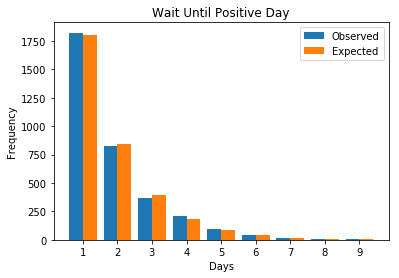

In [368]:
X = days
Y = contingency["Observed"]
Z = contingency["Geometric Distribution"]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Observed')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Expected')
  
plt.xticks(X_axis, X)
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.title("Wait Until Positive Day")
plt.legend()
plt.show()

In [372]:
chisquare(Y,Z)
# because pvalue is so big, we can't reject the notion BIST100 stock market being up or down on a given day is independent
# from all other days

Power_divergenceResult(statistic=8.8889253913626156, pvalue=0.3517526340240571)